### Preprocessing Data Analysis

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path

In [2]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
def preprocessFile(filename = Path('../Data/AdultCensusIncome.csv')):
    
    print(f'Preprocessing file {filename}')
    dtype_mapper = {'age': 'int64',
                    'workclass': 'string',
                    'fnlwgt': 'int64',
                    'education': 'string',
                    'education.num': 'int64',
                    'marital.status': 'string',
                    'occupation': 'string',
                    'relationship': 'string',
                    'race': 'string',
                    'sex': 'string',
                    'capital.gain': 'int64',
                    'capital.loss': 'int64',
                    'hours.per.week': 'int64',
                    'native.country': 'string',
                    'income': 'string'}
    df = pd.read_csv(filename, dtype=dtype_mapper, na_values='?')    
    df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income']
    # df = df.drop(['fnlwgt',
    #               'education', 
    #               'capital_gain', 
    #               'capital_loss',
    #               'native_country'], axis=1)
    df = df.dropna()
    return df

census_df = preprocessFile()
census_df.sample(10)

Preprocessing file ..\Data\AdultCensusIncome.csv


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
3159,52,Private,203392,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,5013,0,40,United-States,<=50K
22985,41,Self-emp-not-inc,38876,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K
15731,53,Private,83434,Bachelors,13,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Female,0,0,21,Japan,>50K
1082,24,Private,106085,HS-grad,9,Never-married,Other-service,Own-child,Black,Male,0,1721,30,United-States,<=50K
27375,21,Private,177420,Some-college,10,Never-married,Adm-clerical,Not-in-family,Other,Female,0,0,40,United-States,<=50K
1652,64,Self-emp-inc,185912,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,35,United-States,>50K
15248,43,Private,137126,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
8419,60,Private,225526,HS-grad,9,Separated,Sales,Not-in-family,White,Female,0,0,32,United-States,<=50K
15998,33,Federal-gov,177945,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,Black,Male,0,0,40,United-States,<=50K
5760,37,Private,272950,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


In [9]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  string
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  string
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  string
 6   occupation      30162 non-null  string
 7   relationship    30162 non-null  string
 8   race            30162 non-null  string
 9   sex             30162 non-null  string
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  string
 14  income          30162 non-null  string
dtypes: int64(6), string(9)
memory usage: 3.7 MB


In [15]:
for col in census_df:
    print('-' * 20)
    print(census_df[col].value_counts('f'))
    print('-' * 20)
    

--------------------
age
36    0.028247
31    0.028214
33    0.027750
34    0.027717
37    0.027452
        ...   
82    0.000232
83    0.000166
88    0.000099
85    0.000099
86    0.000033
Name: proportion, Length: 72, dtype: float64
--------------------
--------------------
workclass
Private             0.738877
Self-emp-not-inc    0.082853
Local-gov            0.06853
State-gov           0.042404
Self-emp-inc        0.035608
Federal-gov         0.031265
Without-pay         0.000464
Name: proportion, dtype: Float64
--------------------
--------------------
fnlwgt
203488    0.000431
121124    0.000398
148995    0.000398
123011    0.000398
113364    0.000398
            ...   
216479    0.000033
135480    0.000033
204160    0.000033
114650    0.000033
201490    0.000033
Name: proportion, Length: 20263, dtype: float64
--------------------
--------------------
education
HS-grad         0.326238
Some-college    0.221404
Bachelors        0.16723
Masters         0.053942
Assoc-voc       0.0

In [14]:
num_features = [col for col in census_df.columns if census_df[col].dtype != 'string']
cat_features = [col for col in census_df.columns if census_df[col].dtype == 'string']

print('Numeric Features:', num_features)
print('-'*20)
print('String Features:', cat_features)

Numeric Features: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
--------------------
String Features: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [48]:
def stringFeaturesBarChart(feature):
    # myFigSize=(16,8)
    ax=sns.countplot(data = census_df ,x = feature, edgecolor='k', palette='Set2')
    ax.set_title('Income Count')
    ax.set_xlabel(feature)
    # plt.figure(figsize=myFigSize)
    
    plt.xticks(rotation=45)
    plt.show()

    

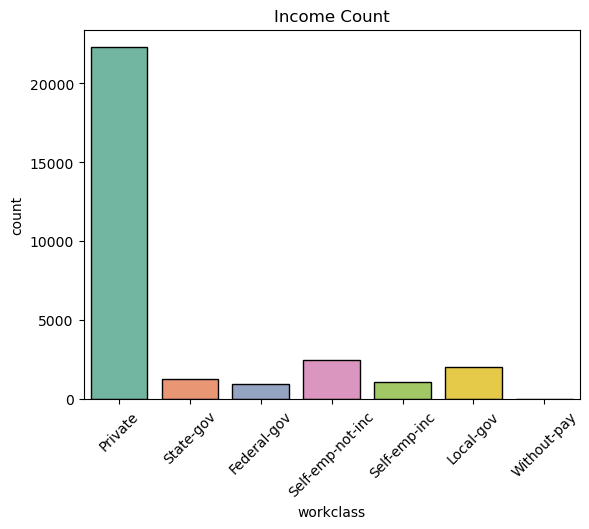

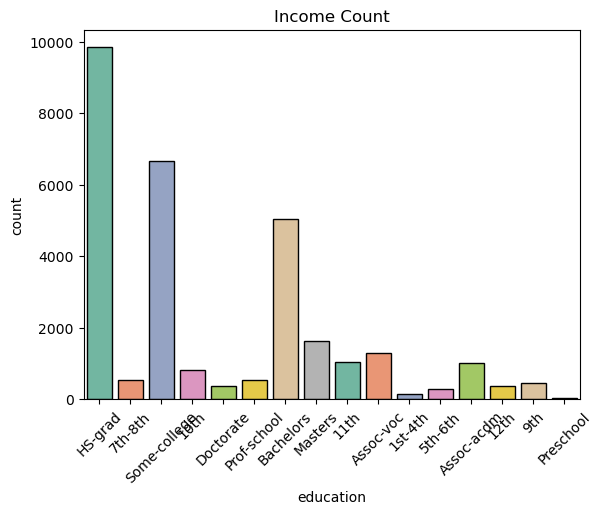

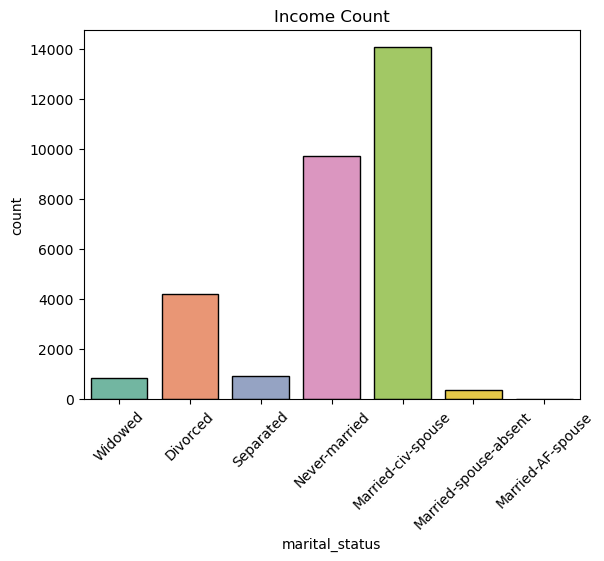

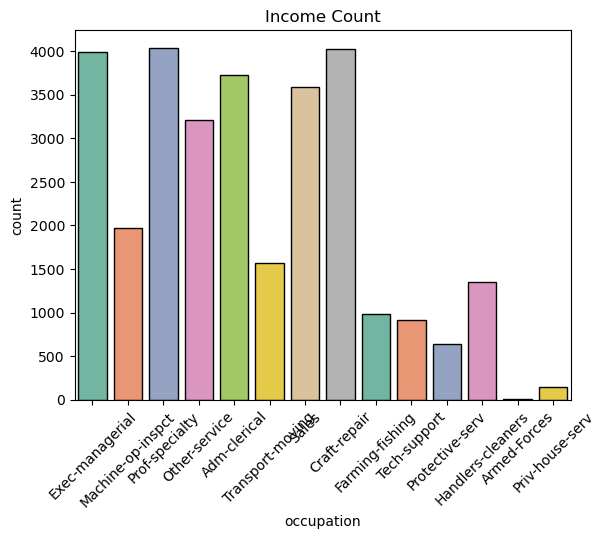

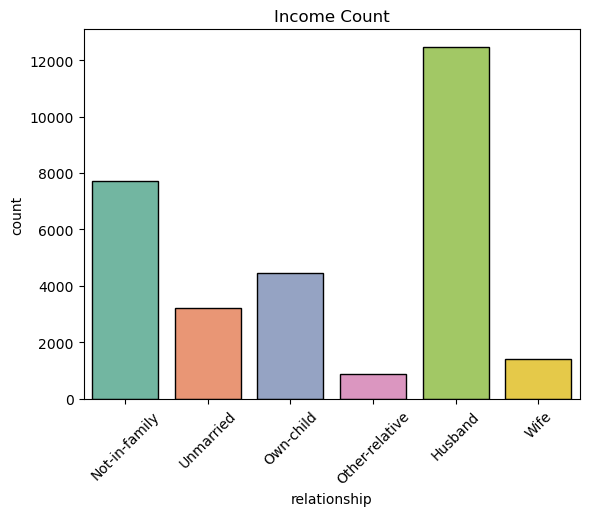

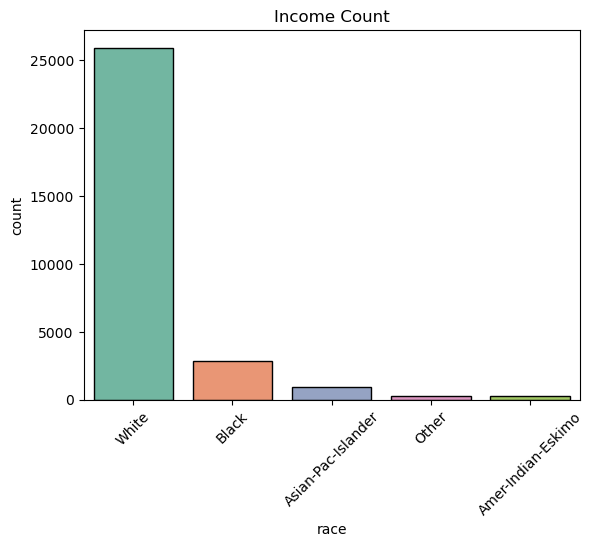

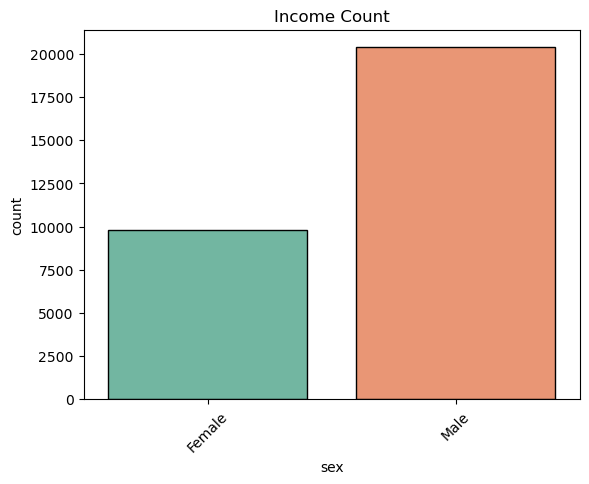

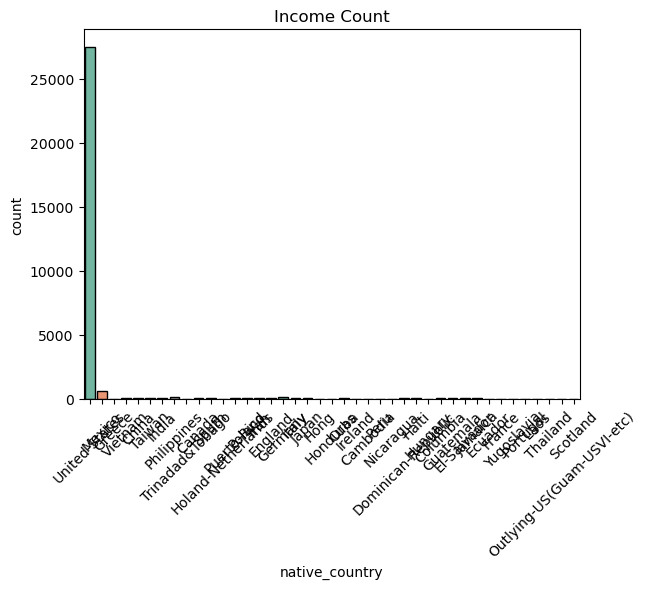

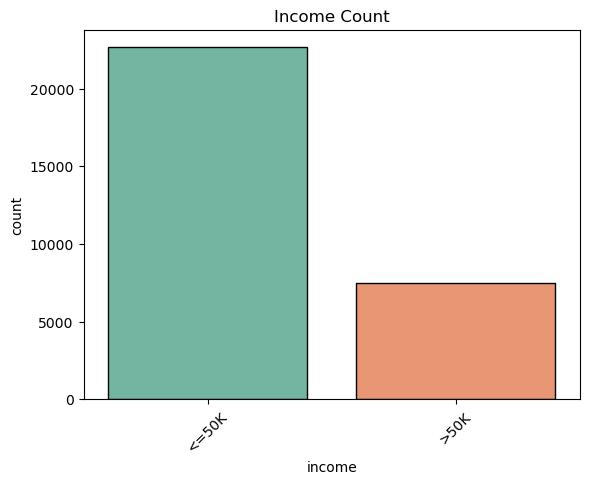

In [49]:
for feature in cat_features:
    stringFeaturesBarChart(feature)

In [52]:
def plotNumFeatures(feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=census_df, x=feature, kde=True)
    plt.title('Income Count')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


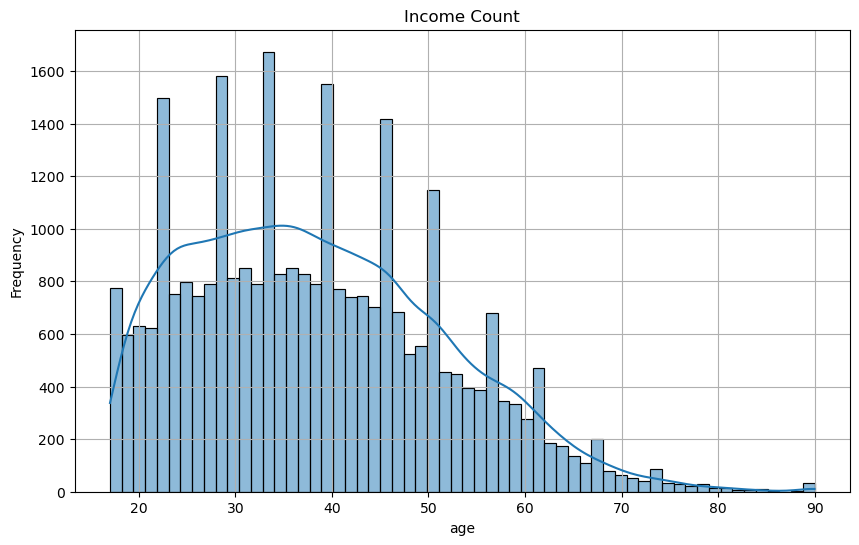

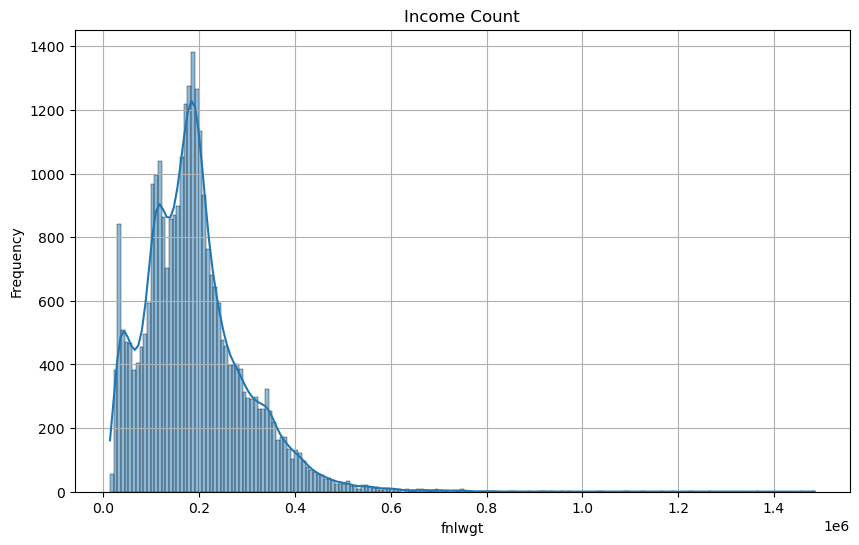

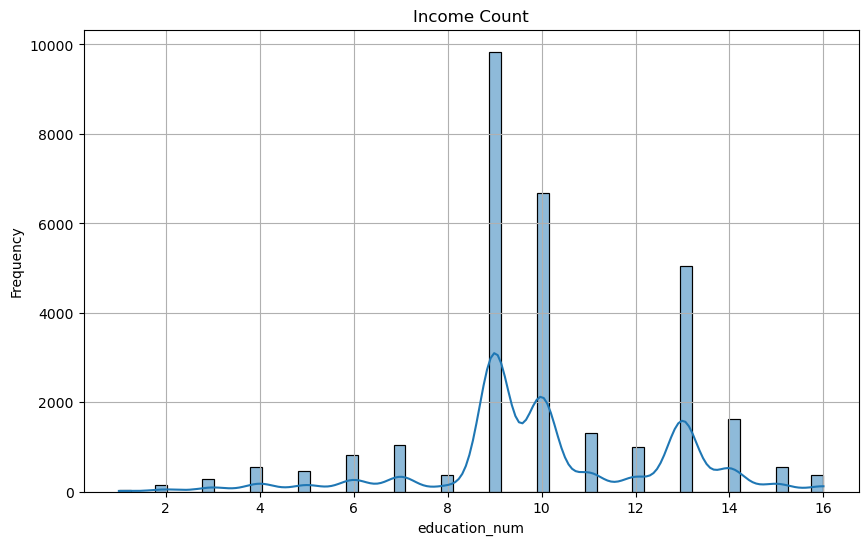

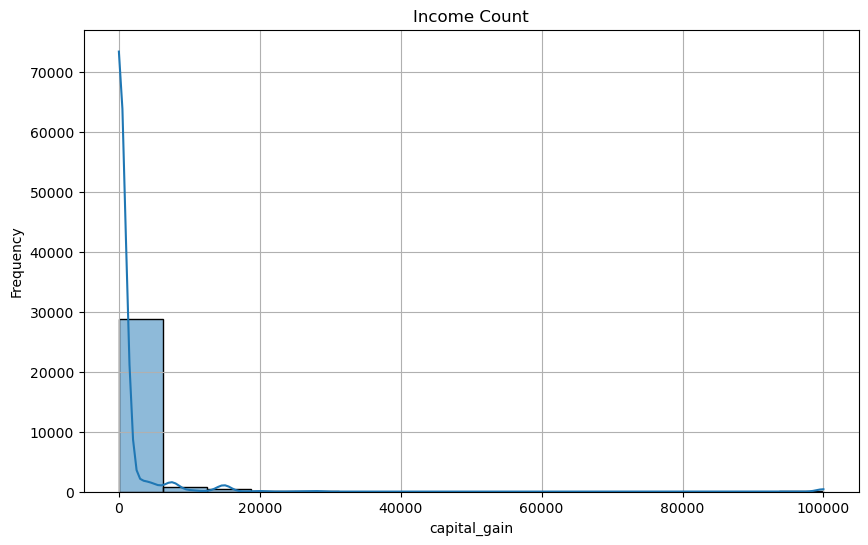

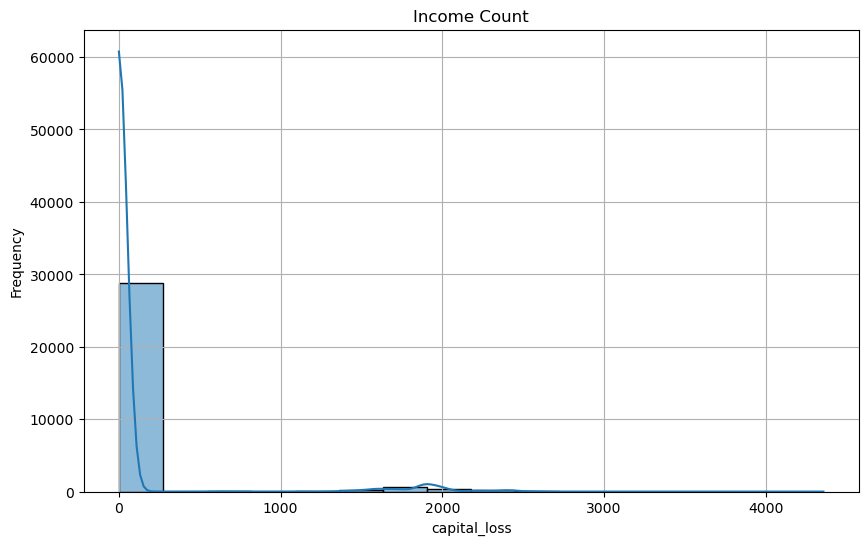

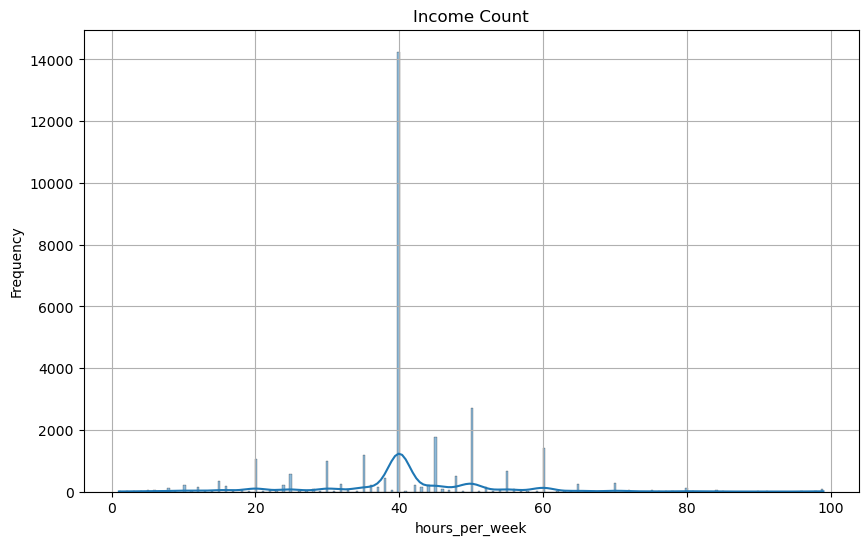

In [53]:
for feature in num_features:
    plotNumFeatures(feature)

In [54]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
census_df.income = encoder.fit_transform(census_df.income)

census_df.income.value_counts()




income
0    22654
1     7508
Name: count, dtype: int64

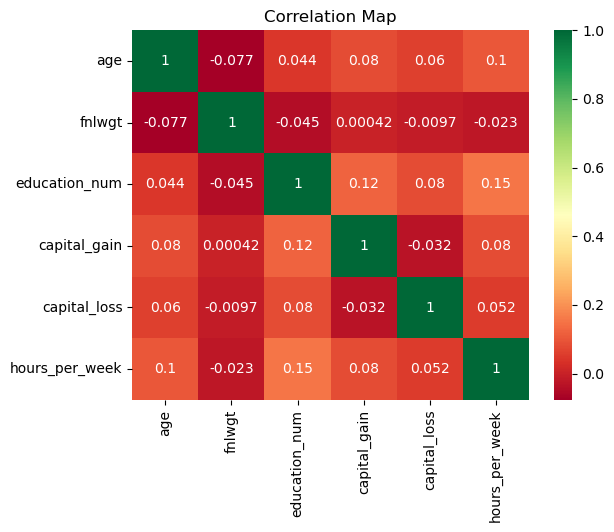

In [55]:
census_df_copy = census_df.copy()

# drop string columns
for feature in cat_features:
    census_df_copy.drop(feature, axis=1,inplace=True)
    
    
ax=sns.heatmap(census_df_copy.corr(), cmap='RdYlGn',annot=True)
ax.set_title('Correlation Map')
plt.show()